# Mobile Price Classification Using KNN

In [162]:
import pandas as pd
import seaborn as sns

Import the required data from CSV file using Pandas

In [163]:
data = pd.read_csv('train.csv')

In [164]:
data.shape

(2000, 21)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [166]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [167]:
print(data.price_range.value_counts())

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64


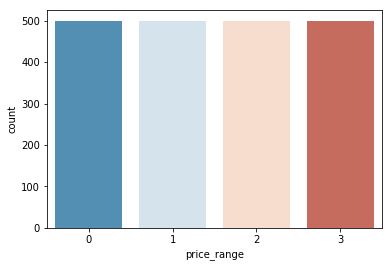

In [168]:
sns.countplot(x='price_range',data=data,palette='RdBu_r')

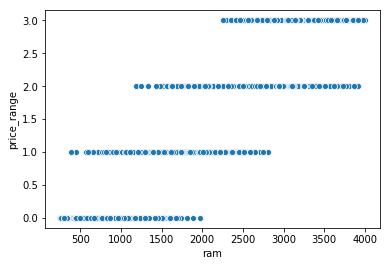

In [169]:
sns.scatterplot(y='price_range',x='ram',data=data)

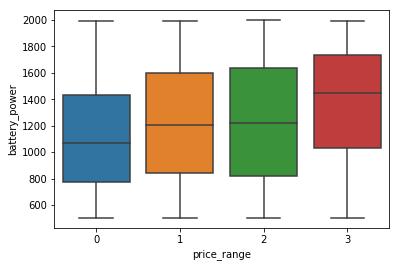

In [170]:
sns.boxplot(x="price_range", y="battery_power", data=data)

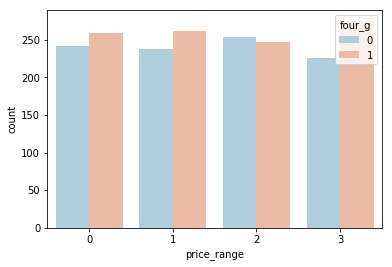

In [171]:
sns.countplot(x='price_range',hue='four_g', data=data,palette='RdBu_r')


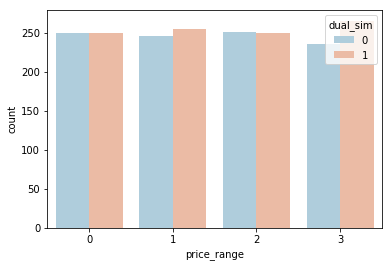

In [172]:
sns.countplot(x='price_range',hue='dual_sim', data=data,palette='RdBu_r')

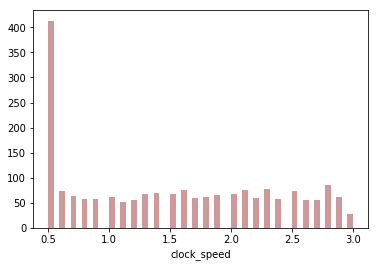

In [173]:
sns.distplot(data['clock_speed'],kde=False,color='darkred',bins=55)

In [174]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [175]:
from sklearn.model_selection import train_test_split

Split data into test and train data

In [176]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price_range',axis=1), 
                                                    data['price_range'], test_size=0.33, 
                                                    random_state=101)

We are creating a KNN model

In [177]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In order to find a suitable 'n_neighbors' value, <br/>
we use elbow method.<br/>
We selected the value (9) which causes the least error 

In [178]:
#error_rate = []
#score = []
#for i in range(1,20):
    
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train,y_train)
#    pred_i = knn.predict(X_test)
#    error_rate.append(np.mean(pred_i != y_test))
#    score.append(knn.score(X_test,y_test))
    
#error_rate

In [187]:
knn.score(X_test,y_test)

0.9287878787878788

In [180]:
preds = knn.predict(X_test)

In [181]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [182]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       159
           1       0.95      0.88      0.91       165
           2       0.86      0.93      0.90       185
           3       0.93      0.93      0.93       151

   micro avg       0.93      0.93      0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [183]:
print(accuracy_score(preds,y_test))

0.9287878787878788


In [184]:
matrix=confusion_matrix(y_test,preds)
print(matrix)

[[155   3   0   0]
 [  4 145   3   0]
 [  0  17 172  10]
 [  0   0  10 141]]


In conclusion, <br/>
KNN Model gives around 93% accuracy for Mobile Price Classification Data